In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from ipywidgets import *

from IPython.core.display import display, HTML
display(HTML("<style>.widget-hslider { width:60% !important; }</style>"))

In [2]:
from data import *
from model import *

In [3]:
oiii = for_oiii()
oiii = oiii[oiii["loglbol"] > 46]

oiii_res = np.loadtxt("../res/oiii.res")

In [4]:
stats = [(np.mean(xs), np.std(xs)) for xs in oiii_res[:,0:5].T]

In [5]:
stats

[(45.31967801779629, 0.210072471338903),
 (1422.9685354761298, 204.46179577177307),
 (45.0145887340659, 1.0231826843779182),
 (0.005276558951609813, 0.1644450478330763),
 (45.66549752273935, 0.3454921562515225)]

In [6]:
style = {"width": "700px"}

def manipulate(data, params_):
    rsr, wavelength, lum, lum_unc = prepare_data(data)
    
    def plot(disk_amp, dust_temp, dust_lbol, av, cold_dust, dust_mod):
        residual = get_residual(dust_models[int(dust_mod)], rsr, wavelength, lum, lum_unc)
        params = [disk_amp, dust_temp, dust_lbol, av, cold_dust]
        show(data, [*params, residual(params), dust_mod])
    
    interact(
        plot,
        disk_amp = widgets.FloatSlider(
            value=params_[0], 
            min=stats[0][0]-3*stats[0][1], 
            max=stats[0][0]+3*stats[0][1],
            step=stats[0][1]/20,
            continuous_update=False,
            style=style
        ),
        dust_temp = widgets.FloatSlider(
            value=params_[1], 
            min=stats[1][0]-3*stats[1][1], 
            max=stats[1][0]+3*stats[1][1],
            step=stats[1][1]/20,
            continuous_update=False,
            style=style
        ),
        dust_lbol = widgets.FloatSlider(
            value=params_[2], 
            min=stats[2][0]-3*stats[2][1], 
            max=stats[2][0]+3*stats[2][1],
            step=stats[2][1]/20,
            continuous_update=False,
            style=style
        ),
        av = widgets.FloatSlider(
            value=params_[3], 
            min=stats[3][0]-3*stats[3][1], 
            max=stats[3][0]+2*stats[3][1],
            step=stats[3][1]/20,
            continuous_update=False,
            style=style
        ),
        cold_dust = widgets.FloatSlider(
            value=params_[4], 
            min=stats[4][0]-3*stats[4][1], 
            max=stats[4][0]+3*stats[4][1],
            step=stats[4][1]/20,
            continuous_update=False,
            style=style
        ),
        dust_mod = widgets.RadioButtons(
            options=[0,1,2],
            value=int(params_[-1])
        )
    )

In [7]:
res = oiii_res[:,-2]

In [8]:
res

array([13.83116953, 14.88777695, 17.03251784, ..., 14.24312682,
       46.66858484, 43.9526561 ])

In [9]:
len(oiii[res>200])

18

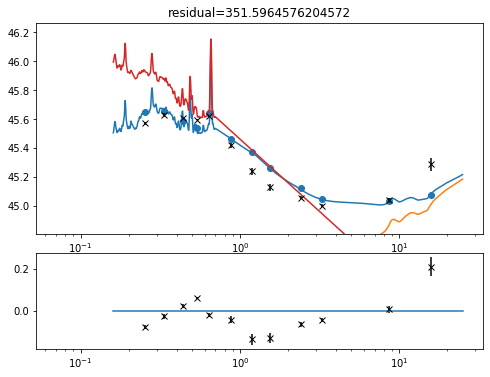

22


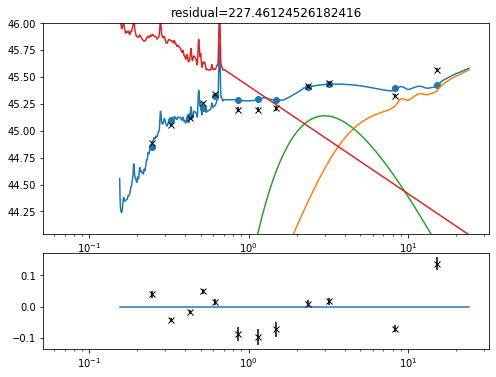

153


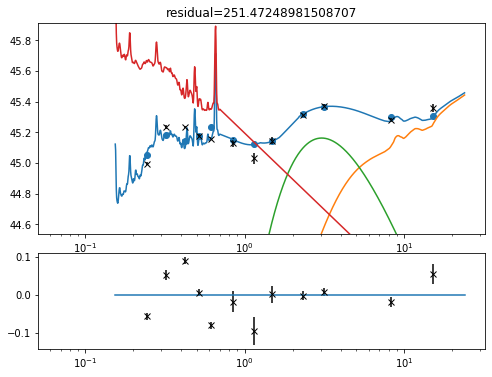

627


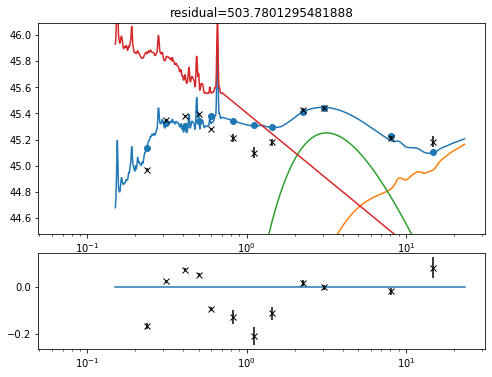

658


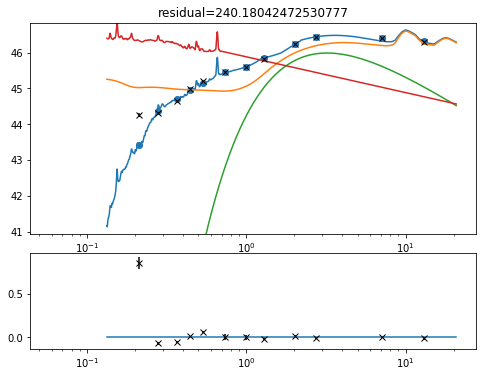

717


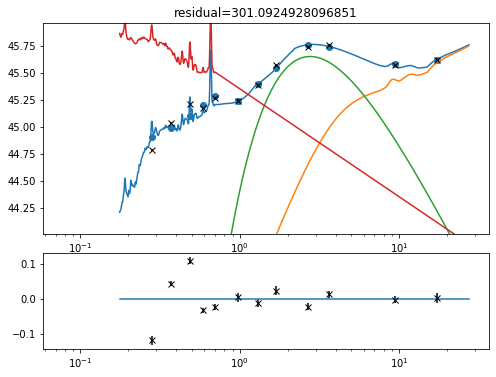

840


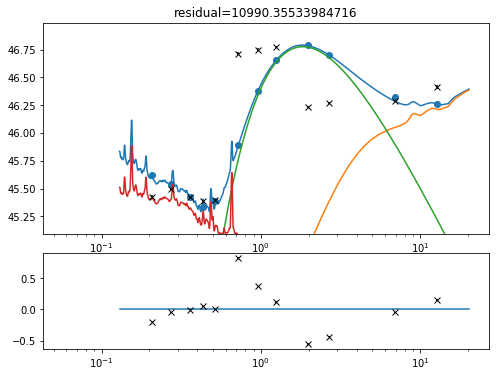

899


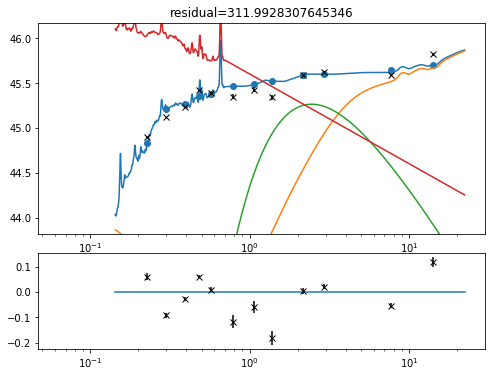

920


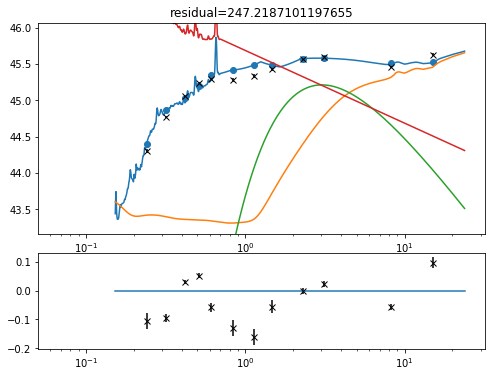

937


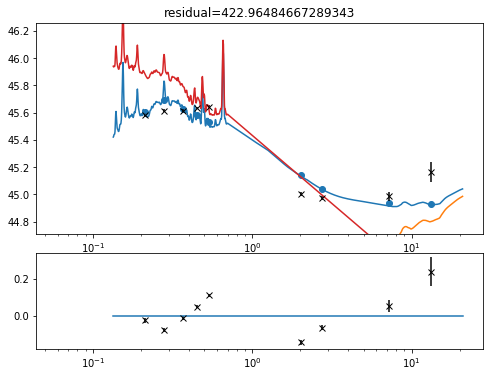

1199


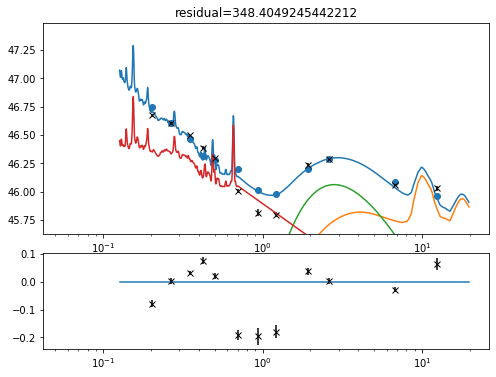

1243


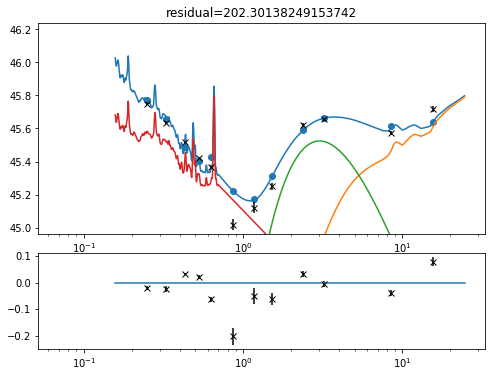

1330


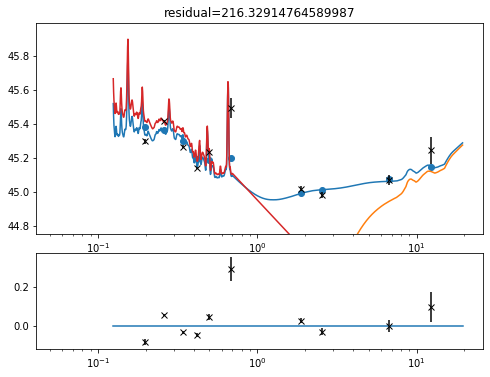

1440


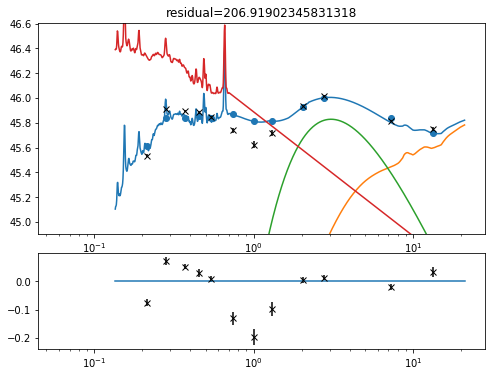

1558


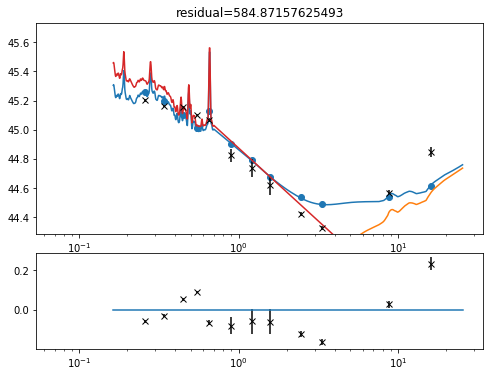

1616


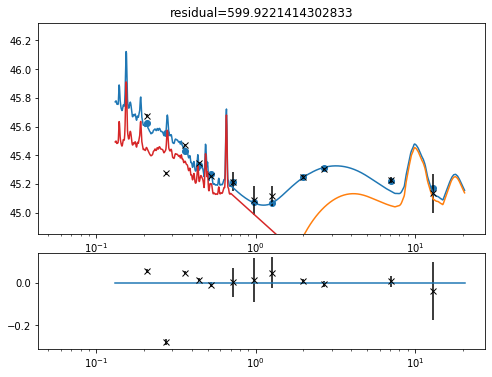

1745


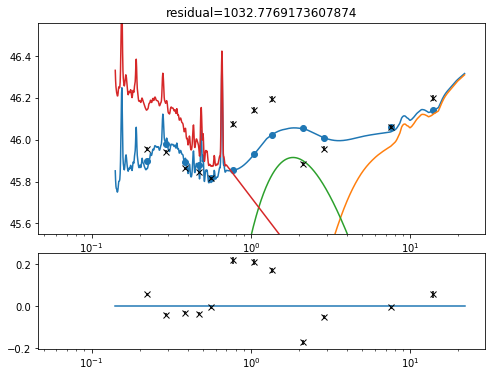

1781


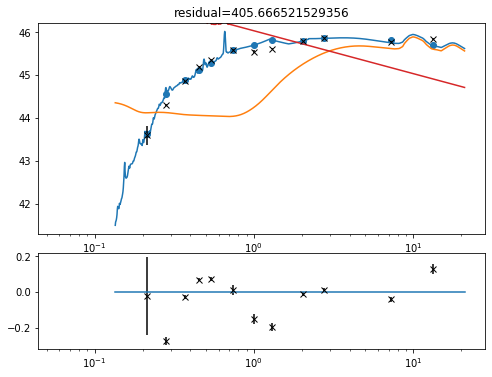

1913


In [10]:
for i in range(len(oiii)):
    if res[i] > 200:
        show(oiii[i], oiii_res[i])
        print(i)

In [11]:
manipulate(oiii[22], oiii_res[22])

interactive(children=(FloatSlider(value=45.68379228525705, continuous_update=False, description='disk_amp', ma…